# Experiments with NDVI

In [59]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio

## Reading the muti-band file:

In [8]:
!ls -lah ~/Documents/GeoTiffTools/venv/bgren.tiff

-rw-rw-r-- 1 amin amin 22M Oct 25 10:26 /home/amin/Documents/GeoTiffTools/venv/bgren.tiff


In [ ]:
img = imageio.volread('~/Documents/GeoTiffTools/venv/bgren.tiff')

## Calculating the NDVI
As stated [here](https://micasense.com/red-edge-sample-data/), the sencond and the forth bands of the file are red and near infrared bands, respectively.

Therefore, NDVI is calculated based on the following formula:

$NDVI=\frac{NIR-RED}{NIR+RED}$

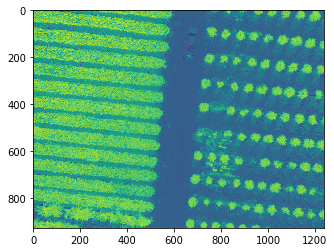

In [12]:
l2=img[:,:,2]
l4=img[:,:,4]
ndvi = (l4-l2)/(l4+l2)
plt.imshow(ndvi)

As it is shown above, it seems the calculations are correct.
## Processing the image:
Since I don't know how the NDVI data must be processed, I do a basic operation. I consider a threshold, and calculate the percentage of the NDVI values above that. I consider the threshold to be the half of the maximum NDVI value in the image.

In [60]:
m = max(ndvi.reshape(-1))
threshold = m * 0.5
print("Max NDVI pixel value: {0:4.2}, threshold: {1:4.2}".format(m, threshold))

Max NDVI pixel value:  0.9, threshold: 0.45


In [61]:
above_threshold = 100. * np.sum(ndvi >= threshold) / (ndvi.shape[0]*ndvi.shape[1])
print("Percentage of pixels above the threshold: {0:4.3}".format(above_threshold))

Percentage of pixels above the threshold: 37.2


## Conclusion
Based on what I see in the image, and the percentage I calculated, I think around 37 percentage of the image is covered with healthy vegetation.

Another process can also be done on the image to find where the above threshold points do exist, or where they don't (in case of finding unhealthy vegetations).

If a set of images from the same place is provided, I will check what is happening to the overal health, or if all parts of the farm are the same with regards to NDVI.